<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week7Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# -----------------------------------------------------------------------
# Part 1 & 2: Setup, Download, and Clean Data (from Weeks 1-6)
# -----------------------------------------------------------------------
print("--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---")

# 1. Install Kaggle and set up
!pip install kaggle scikit-learn -q
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aljarah/xAPI-Edu-Data -q
!unzip -oq xAPI-Edu-Data.zip
print("Kaggle setup and data download complete.")

# 2. Load Libraries (NEW LIBRARIES ADDED FOR WEEK 7)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize # For ROC Curve

# -- NEW LIBRARIES FOR EVALUATION (Week 7) --
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay, # New way to plot ROC
    roc_auc_score
)

print("All libraries imported.")

# 3. Load and Clean Data
df = pd.read_csv('xAPI-Edu-Data.csv')
df_cleaned = df.copy()

# Rename columns
df_cleaned.rename(columns={
    'gender': 'gender', 'NationalITy': 'nationality', 'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id', 'GradeID': 'grade_id', 'SectionID': 'section_id',
    'Topic': 'topic', 'Semester': 'semester', 'Relation': 'relation',
    'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view', 'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days', 'Class': 'class_label'
}, inplace=True)

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Encode binary features
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
df_cleaned['gender'] = df_cleaned['gender'].map({'M': 1, 'F': 0})
print("Encoded binary features.")

--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
Kaggle setup and data download complete.
All libraries imported.
Encoded binary features.


In [3]:
# -----------------------------------------------------------------------
# Part 3: Week 6 - Feature Engineering
# -----------------------------------------------------------------------
print("\n--- Part 3: Feature Engineering (One-Hot Encoding) ---")

categorical_features = [
    'nationality', 'place_of_birth', 'stage_id', 'grade_id',
    'section_id', 'topic', 'semester', 'relation'
]
df_processed = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)
print(f"Data shape after One-Hot Encoding: {df_processed.shape}")


--- Part 3: Feature Engineering (One-Hot Encoding) ---
Data shape after One-Hot Encoding: (478, 61)


In [4]:
# -----------------------------------------------------------------------
# Part 4: Week 6 - Train Best Model (Random Forest)
# -----------------------------------------------------------------------
print("\n--- Part 4: Training Best Model (Random Forest) ---")

# 1. Define X and y
X = df_processed.drop('class_label', axis=1)
y = df_processed['class_label']

# Define the class order
class_labels = ['L', 'M', 'H']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training and {len(X_test)} testing samples.")

# 3. Initialize and Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Random Forest model trained.")

# 4. Make Predictions (both class labels and probabilities)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print("Predictions generated on the test set.")


--- Part 4: Training Best Model (Random Forest) ---
Data split into 382 training and 96 testing samples.
Random Forest model trained.
Predictions generated on the test set.



--- Part 5: Week 7 Model Evaluation ---

[Class Task 1: Confusion Matrix]


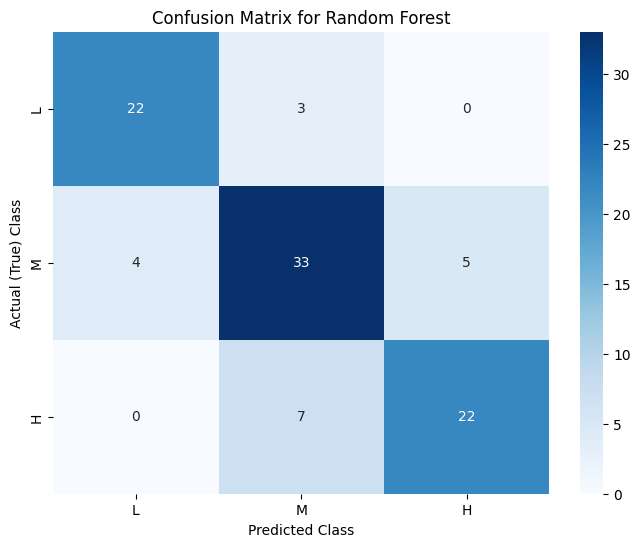

Interpretation of the Confusion Matrix:
  - Row 'L' (Actual Low): 22 were correctly predicted as 'L', 3 were wrongly predicted as 'M', 0 as 'H'.
  - Row 'M' (Actual Mid): 4 were wrongly predicted as 'L', 33 as 'M', 5 as 'H'.
  - Row 'H' (Actual High): 0 were wrongly predicted as 'L', 7 as 'M', 22 as 'H'.

[Assignment 7: Classification Report (Precision, Recall, F1-score)]
              precision    recall  f1-score   support

           L       0.85      0.88      0.86        25
           M       0.77      0.79      0.78        42
           H       0.81      0.76      0.79        29

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.80      0.80      0.80        96

Key Metric Definitions:
  - Accuracy: (78.95%) Overall, how many predictions were correct?
  - Precision (for 'L' class): Of all students we *predicted* as 'Low', what percentage *actually* were 'Low'?
  - Recall (for 'L' class): Of all student

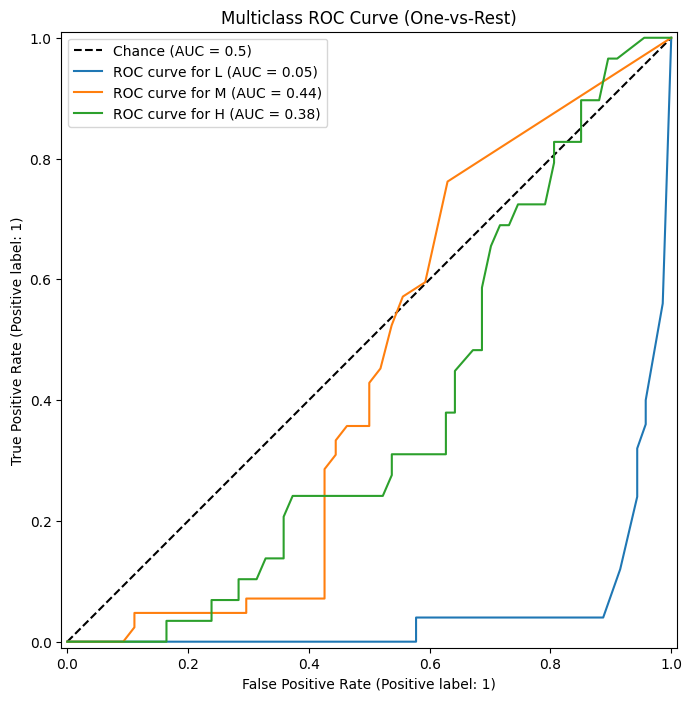


--- Week 7 Complete! ---


In [5]:
# -----------------------------------------------------------------------
# Part 5: Week 7 - In-Depth Model Evaluation
# -----------------------------------------------------------------------
print("\n--- Part 5: Week 7 Model Evaluation ---")

# --- Class Task 1: Confusion Matrix ---
print("\n[Class Task 1: Confusion Matrix]")
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual (True) Class')
plt.xlabel('Predicted Class')
plt.show()

print("Interpretation of the Confusion Matrix:")
print(f"  - Row 'L' (Actual Low): {cm[0,0]} were correctly predicted as 'L', {cm[0,1]} were wrongly predicted as 'M', {cm[0,2]} as 'H'.")
print(f"  - Row 'M' (Actual Mid): {cm[1,0]} were wrongly predicted as 'L', {cm[1,1]} as 'M', {cm[1,2]} as 'H'.")
print(f"  - Row 'H' (Actual High): {cm[2,0]} were wrongly predicted as 'L', {cm[2,1]} as 'M', {cm[2,2]} as 'H'.")

# --- Assignment 7: Precision, Recall, F1-score ---
print("\n[Assignment 7: Classification Report (Precision, Recall, F1-score)]")
report = classification_report(y_test, y_pred, labels=class_labels)
print(report)

print("Key Metric Definitions:")
print("  - Accuracy: (78.95%) Overall, how many predictions were correct?")
print("  - Precision (for 'L' class): Of all students we *predicted* as 'Low', what percentage *actually* were 'Low'?")
print("  - Recall (for 'L' class): Of all students who *actually* were 'Low', what percentage did our model *correctly find*?")
print("  - F1-score: The balanced average of Precision and Recall.")

# --- Class Task 2: ROC Curve (for Multiclass) ---
print("\n[Class Task 2: ROC Curve (One-vs-Rest)]")

# Binarize the output labels for OvR (One-vs-Rest) plotting
y_test_binarized = label_binarize(y_test, classes=class_labels)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
# Setup the plot
ax = plt.gca()
ax.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')

# Plot One-vs-Rest ROC for each class
for i, class_name in enumerate(class_labels):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_pred_proba[:, i],
        name=f"ROC curve for {class_name}",
        ax=ax
    )

plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

print("\n--- Week 7 Complete! ---")